In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.spatial.distance import squareform

import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

## Question 7

In [2]:
USArrests = pd.read_csv('../../data/USArrests.csv', index_col=0)
USArrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
# Scale the data to have mean zero and standard deviation one
scaler = StandardScaler()
USArrests_scaled = scaler.fit_transform(USArrests)

In [4]:
# Squared euclidean distances
euc_distances = pairwise_distances(USArrests_scaled, metric='sqeuclidean')
euc_distances

array([[ 0.        ,  7.4594756 ,  5.36758447, ...,  9.96075989,
        12.53383017,  3.41389473],
       [ 7.4594756 ,  0.        ,  7.44231842, ..., 20.66745116,
        24.21239223, 12.4953264 ],
       [ 5.36758447,  7.44231842,  0.        , ..., 20.63956869,
        15.86121383,  7.39642265],
       ...,
       [ 9.96075989, 20.66745116, 20.63956869, ...,  0.        ,
         4.20868377,  3.61482254],
       [12.53383017, 24.21239223, 15.86121383, ...,  4.20868377,
         0.        ,  3.10587433],
       [ 3.41389473, 12.4953264 ,  7.39642265, ...,  3.61482254,
         3.10587433,  0.        ]])

In [5]:
# Correlation based distance
corr_distances = np.corrcoef(USArrests_scaled)
corr_distances

array([[ 1.        ,  0.28616922, -0.44659478, ...,  0.96159634,
        -0.79306752,  0.65671471],
       [ 0.28616922,  1.        ,  0.16927541, ...,  0.38475333,
        -0.7768919 , -0.32770869],
       [-0.44659478,  0.16927541,  1.        , ..., -0.6034021 ,
         0.00497995, -0.01671234],
       ...,
       [ 0.96159634,  0.38475333, -0.6034021 , ...,  1.        ,
        -0.77733457,  0.43813239],
       [-0.79306752, -0.7768919 ,  0.00497995, ..., -0.77733457,
         1.        , -0.3197538 ],
       [ 0.65671471, -0.32770869, -0.01671234, ...,  0.43813239,
        -0.3197538 ,  1.        ]])

In [6]:
## TODO

## Question 8

### 8.a

In [7]:
# Using the PCA estimator
pca = PCA()
pca.fit(USArrests_scaled)
pves = pca.explained_variance_ratio_
pves

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

### 8.b

In [8]:
# Using the formula (12.10) directly
n, p = USArrests.shape

loadings = pca.components_
loadings = loadings.T

variance_explained = 0
for i in range(n):
    total = 0
    for j in range(p):
        total += loadings[j] * USArrests_scaled[i,j]
    variance_explained += total**2

total_variance = 0
for j in range(p):
    for i in range(n):
        total_variance += USArrests_scaled[i, j]**2
        
variance_explained/total_variance

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

## Question 9

### 9.a

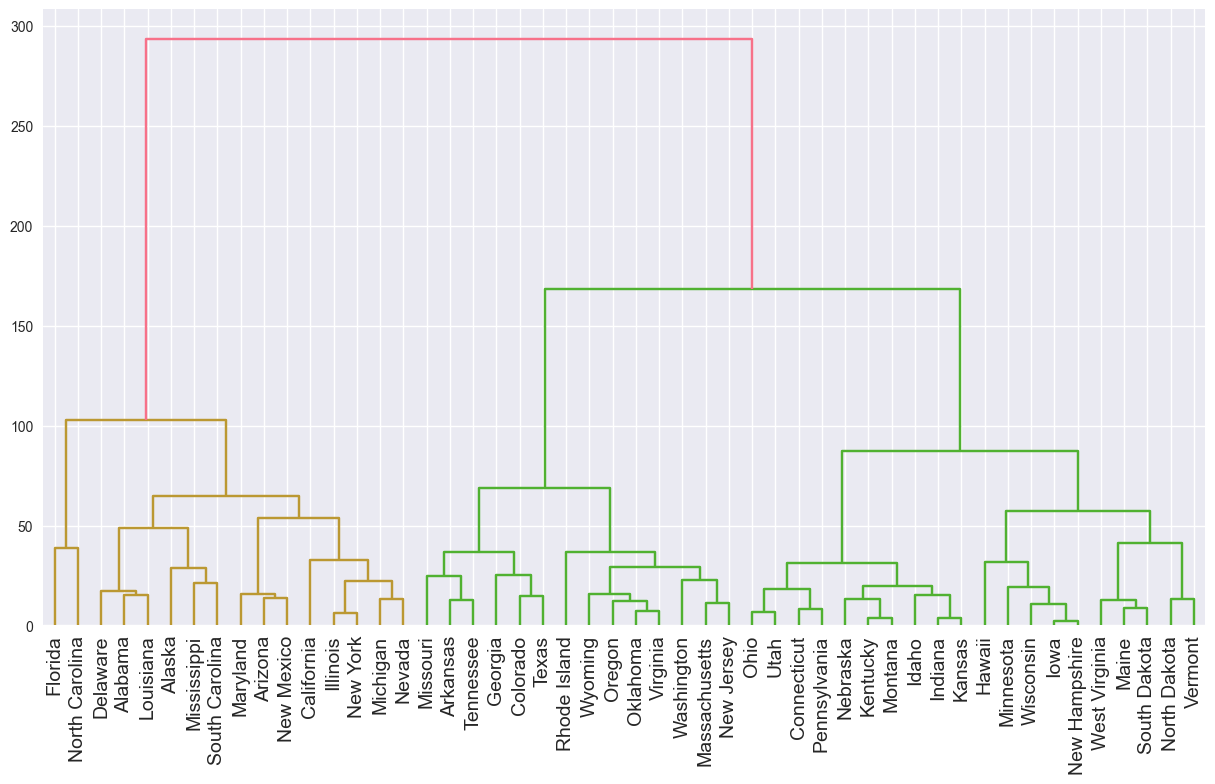

In [9]:
hc_complete = linkage(USArrests, method='complete', 
                      metric='euclidean')

fig = plt.figure(figsize=(15, 8))
dendrogram(hc_complete, labels=USArrests.index, leaf_font_size=14)
plt.show()

### 9.b

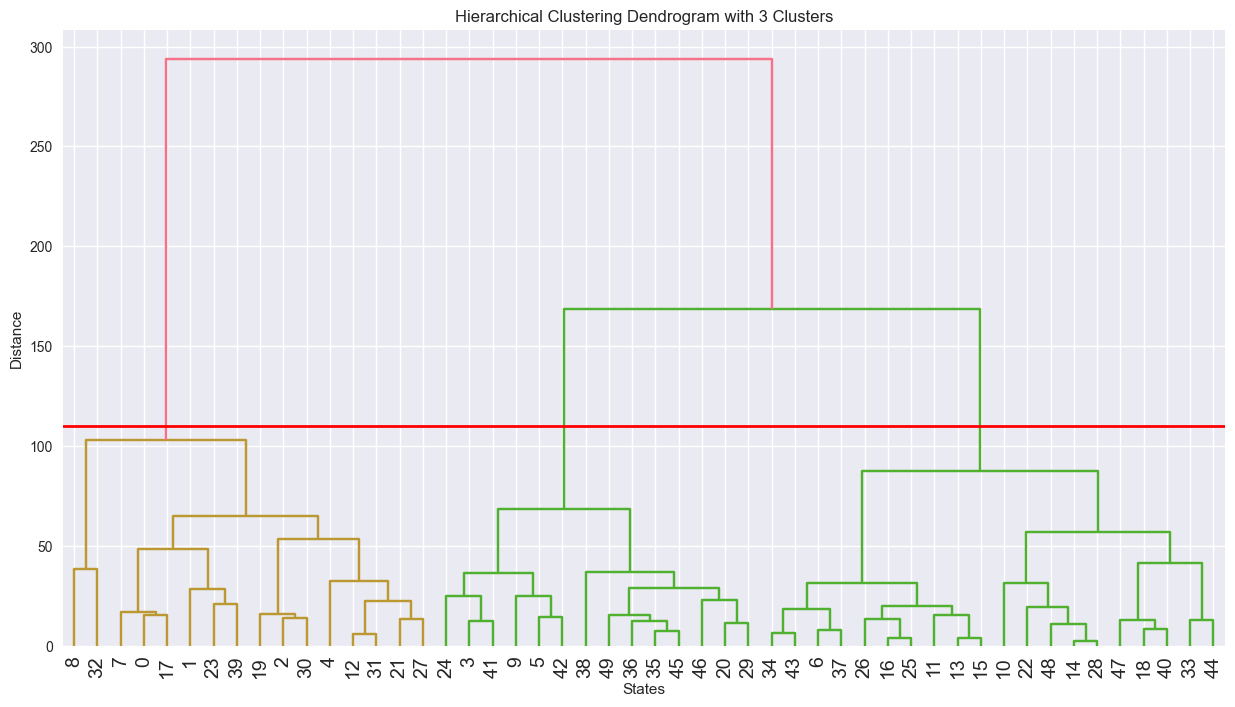

In [10]:
fig = plt.figure(figsize=(15, 8))
dendrogram(hc_complete, leaf_font_size=14, p=3)
plt.axhline(y=110, color="red", lw=2)
plt.xlabel('States')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram with 3 Clusters')
plt.show()

In [11]:
clusters = fcluster(hc_complete, t=3, criterion='maxclust')
pd.DataFrame({'States':USArrests.index, 'Cluster':clusters})

,States,Cluster
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,2
4,California,1
5,Colorado,2
6,Connecticut,3
7,Delaware,1
8,Florida,1
9,Georgia,2


### 9.c

In [12]:
scaler = StandardScaler()
USA_scaled = scaler.fit_transform(USArrests)

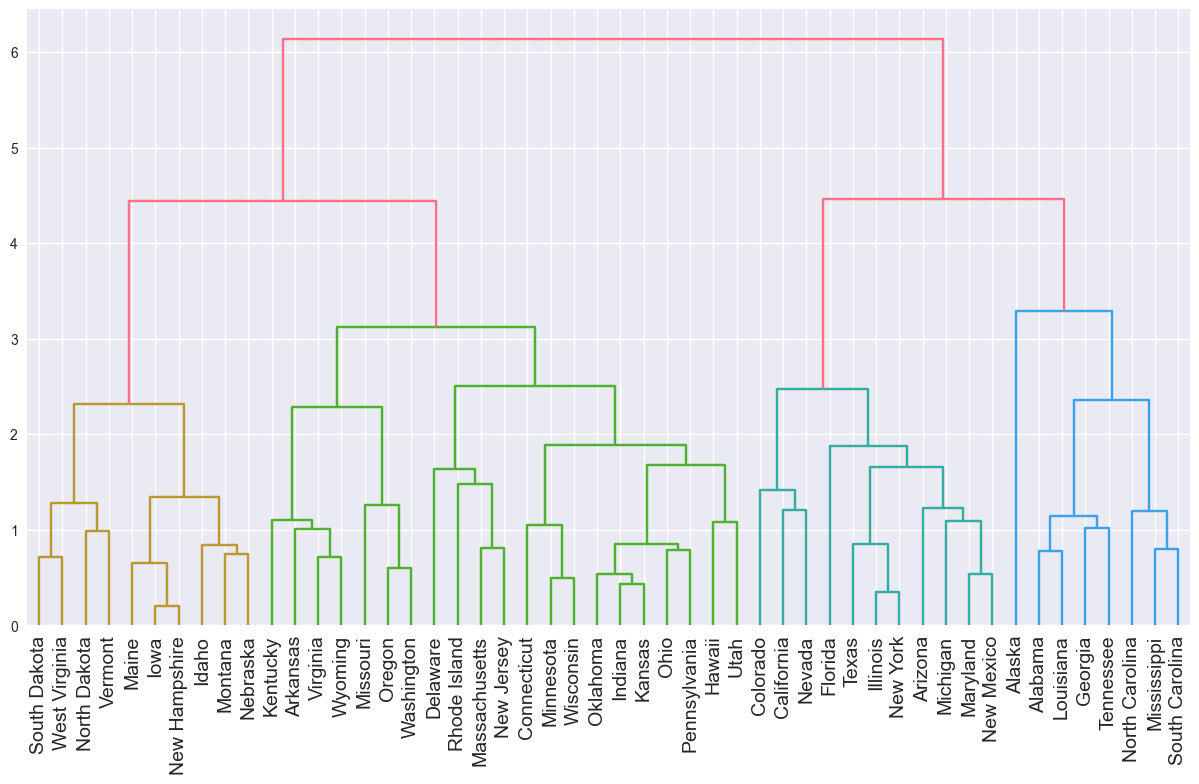

In [13]:
hc_complete = linkage(USA_scaled, method='complete', 
                      metric='euclidean')

fig = plt.figure(figsize=(15, 8))
dendrogram(hc_complete, labels=USArrests.index, leaf_font_size=14)
plt.show()

### 9.d

Due to the differences in units between the features, modeling a clustering model without scaling the data to have a mean of zero and a standard deviation of one would introduce bias towards features with larger units compared to others. This is because features with larger units can have a larger influence on the clustering algorithm, leading to an unfair weighting of those features in the clustering process. Scaling the data helps to remove this bias and ensure that each feature contributes equally to the clustering results.

## Question 10

### 10.a

In [14]:
np.random.seed(0)
data = np.random.normal(size=(60,50))
data[:20, :] = data[:20, :] + 1
data[40:, :] = data[40:, :] - 1

In [15]:
real_cluster = np.zeros((60, ))
real_cluster[20:40] = real_cluster[20:40] + 1
real_cluster[40:] = real_cluster[40:] + 2

### 10.b

Text(0, 0.5, 'Second Principal Component')

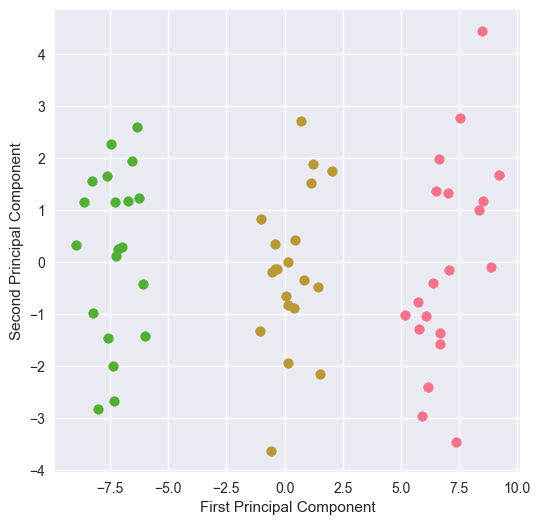

In [16]:
pca = PCA()
pca.fit(data)

scores = pca.transform(data)[:, :2]
plt.figure(figsize=(6,6))
plt.scatter(scores[:20, 0], scores[:20, 1])
plt.scatter(scores[20:40, 0], scores[20:40, 1])
plt.scatter(scores[40:, 0], scores[40:, 1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

### 10.c

In [17]:
kmeans = KMeans(n_clusters=3, n_init=20)
kmeans.fit(data)

KMeans(n_clusters=3, n_init=20)

In [18]:
pd.crosstab(kmeans.labels_, real_cluster)

col_0,0.0,1.0,2.0
row_0,,,
0,0,20,0
1,20,0,0
2,0,0,20


### 10.d

In [19]:
kmeans2 = KMeans(n_clusters=2, n_init=20)
kmeans2.fit(data)
pd.crosstab(kmeans2.labels_, real_cluster)

col_0,0.0,1.0,2.0
row_0,,,
0,0,0,20
1,20,20,0


The algorithm clusters the first 40 observations together and the last 20 observations separately.

### 10.e

In [20]:
kmeans3 = KMeans(n_clusters=4, n_init=20)
kmeans3.fit(data)
pd.crosstab(kmeans3.labels_, real_cluster)

col_0,0.0,1.0,2.0
row_0,,,
0,0,0,11
1,20,0,0
2,0,0,9
3,0,20,0


The algorithm clusters the last two classes very well, but it fails to cluster the observations from the first class correctly.

### 10.f

In [21]:
kmeans4 = KMeans(n_clusters=3, n_init=20)
kmeans4.fit(scores)
pd.crosstab(kmeans4.labels_, real_cluster)

col_0,0.0,1.0,2.0
row_0,,,
0,0,0,20
1,20,0,0
2,0,20,0


The algorithm successfully separates the observations using the information from the principal component scores obtained from the PCA algorithm.

### 10.g

In [22]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [23]:
kmeans5 = KMeans(n_clusters=3, n_init=20)
kmeans5.fit(data_scaled)
pd.crosstab(kmeans5.labels_, real_cluster)

col_0,0.0,1.0,2.0
row_0,,,
0,0,20,0
1,0,0,20
2,20,0,0


The algorithm successfully separated the data; however, it assigned different labels to the first and second classes compared to your initial clustering.

## Question 11

In [24]:
def matrix_completion(matrix, M=1, max_iter=1000, print_progress=False):
    Xhat = matrix.copy()
    ismiss = np.isnan(Xhat)
    Xbar = np.nanmean(Xhat, axis=0)
    Xhat[ismiss] = np.take(Xbar, np.where(ismiss)[1])  
    
    thresh = 1e-7
    rel_err = 1
    count = 0
    mssold = np.mean(Xhat[~ismiss]**2)
    mss0 = np.mean(matrix[~ismiss]**2)
    
    def low_rank(X, M=M):                   
        U, D, V = np.linalg.svd(X, full_matrices=False)
        L = U[:,:M] * D[None,:M]
        return L.dot(V[:M]) 
    
    while rel_err > thresh:
        count += 1
        
        Xapp = low_rank(Xhat, M=M)
        Xhat[ismiss] = Xapp[ismiss]
        mss = np.mean(((matrix - Xapp)[~ismiss])**2)
        rel_err = (mssold - mss) / mss0
        mssold = mss
        
        if print_progress:
            print("Iteration: {0}, MSS:{1:.3f}, Rel.Err {2:.2e}"
                  .format(count, mss, rel_err))
        
        if count == max_iter:
            break
        
    return Xapp

In [25]:
boston = pd.read_csv('../../data/boston.csv')

scaler = StandardScaler()
boston_ = scaler.fit_transform(boston)

In [26]:
## TODOOOO

percentage = 5

while percentage <= 30:
    print(f'Percentage - {percentage}')
    dataset = boston_.copy()
    num_observations = int(dataset.shape[0] * percentage / 100)
    random_indices = random.sample(range(dataset.shape[0]), num_observations)
    
    num_columns = int(dataset.shape[1] * percentage / 100) + 1
    selected_columns = random.sample(range(dataset.shape[1]), num_columns)

    ismiss = np.zeros_like(dataset, dtype=bool)
    ismiss[np.ix_(random_indices, selected_columns)] = True
    
    for i in random_indices:
        for j in selected_columns:
            dataset[i, j] = np.nan
    
    for m in range(1, 9):
        print('\nM: ', m)
        Xapp = matrix_completion(dataset, M=m)
        correlation_matrix = np.corrcoef(Xapp[ismiss], boston_[ismiss])
        print('Correlation - ', correlation_matrix[0, 0])
    print('--'*30)
    percentage += 5

Percentage - 5

M:  1
Correlation -  1.0

M:  2
Correlation -  1.0

M:  3
Correlation -  1.0

M:  4
Correlation -  1.0

M:  5
Correlation -  1.0

M:  6
Correlation -  1.0

M:  7
Correlation -  1.0

M:  8
Correlation -  1.0
------------------------------------------------------------
Percentage - 10

M:  1
Correlation -  1.0

M:  2
Correlation -  1.0

M:  3
Correlation -  0.9999999999999999

M:  4
Correlation -  1.0

M:  5
Correlation -  1.0

M:  6
Correlation -  1.0

M:  7
Correlation -  1.0

M:  8
Correlation -  1.0
------------------------------------------------------------
Percentage - 15

M:  1
Correlation -  1.0

M:  2
Correlation -  1.0

M:  3
Correlation -  1.0

M:  4
Correlation -  0.9999999999999999

M:  5
Correlation -  1.0

M:  6
Correlation -  1.0

M:  7
Correlation -  1.0

M:  8
Correlation -  0.9999999999999999
------------------------------------------------------------
Percentage - 20

M:  1
Correlation -  1.0

M:  2
Correlation -  1.0

M:  3
Correlation -  0.999999999

## Question 12

In [27]:
def matrix_completion2(matrix, M=1, max_iter=1000, print_progress=False):
    Xhat = matrix.copy()
    ismiss = np.isnan(Xhat)
    Xbar = np.nanmean(Xhat, axis=0)
    Xhat[ismiss] = np.take(Xbar, np.where(ismiss)[1])  
    
    thresh = 1e-7
    rel_err = 1
    count = 0
    mssold = np.mean(Xhat[~ismiss]**2)
    mss0 = np.mean(matrix[~ismiss]**2)
    
    def low_rank(X, M=M):                   
        pca = PCA(n_components=M)
        pca.fit(Xhat)
        scores = pca.transform(Xhat)
        loadings = pca.components_
        return np.matmul(scores, loadings)
    
    while rel_err > thresh:
        count += 1
        
        Xapp = low_rank(Xhat, M=M)
        Xhat[ismiss] = Xapp[ismiss]
        mss = np.mean(((matrix - Xapp)[~ismiss])**2)
        rel_err = (mssold - mss) / mss0
        mssold = mss
        
        if print_progress:
            print("Iteration: {0}, MSS:{1:.3f}, Rel.Err {2:.2e}"
                  .format(count, mss, rel_err))
        
        if count == max_iter:
            break
        
    return Xapp

In [28]:
## TODO

percentage = 5

while percentage <= 30:
    print(f'Percentage - {percentage}')
    dataset = boston_.copy()
    num_observations = int(dataset.shape[0] * percentage / 100)
    random_indices = random.sample(range(dataset.shape[0]), num_observations)
    
    num_columns = int(dataset.shape[1] * percentage / 100) + 1
    selected_columns = random.sample(range(dataset.shape[1]), num_columns)

    ismiss = np.zeros_like(dataset, dtype=bool)
    ismiss[np.ix_(random_indices, selected_columns)] = True
    
    for i in random_indices:
        for j in selected_columns:
            dataset[i, j] = np.nan
    
    for m in range(1, 9):
        print('\nM: ', m)
        Xapp = matrix_completion2(dataset, M=m)
        correlation_matrix = np.corrcoef(Xapp[ismiss], boston_[ismiss])
        print('Correlation - ', correlation_matrix[0, 0])
    print('--'*30)
    percentage += 5

Percentage - 5

M:  1
Correlation -  0.9999999999999999

M:  2
Correlation -  1.0

M:  3
Correlation -  1.0

M:  4
Correlation -  1.0

M:  5
Correlation -  0.9999999999999999

M:  6
Correlation -  0.9999999999999999

M:  7
Correlation -  1.0

M:  8
Correlation -  0.9999999999999998
------------------------------------------------------------
Percentage - 10

M:  1
Correlation -  1.0

M:  2
Correlation -  1.0

M:  3
Correlation -  1.0

M:  4
Correlation -  1.0

M:  5
Correlation -  1.0

M:  6
Correlation -  1.0

M:  7
Correlation -  1.0

M:  8
Correlation -  1.0
------------------------------------------------------------
Percentage - 15

M:  1
Correlation -  1.0

M:  2
Correlation -  0.9999999999999999

M:  3
Correlation -  1.0

M:  4
Correlation -  0.9999999999999999

M:  5
Correlation -  1.0

M:  6
Correlation -  1.0

M:  7
Correlation -  0.9999999999999998

M:  8
Correlation -  1.0
------------------------------------------------------------
Percentage - 20

M:  1
Correlation -  0.9

## Question 13

### 13.a

In [29]:
data = pd.read_csv('../../data/Ch12Ex13.csv', header=None)
data = data.T
data.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-0.961933,-0.292526,0.258788,-1.152132,0.195783,0.030124,0.085418,1.116610,-1.218857,1.267369,...,1.325041,-0.116171,-1.470146,-0.379272,-1.465006,1.075148,-1.226125,-3.056328,1.450658,0.717977
1,0.441803,-1.139267,-0.972845,-2.213168,0.593306,-0.691014,-1.113054,1.341700,-1.277279,-0.918349,...,0.740838,-0.162392,-0.633375,-0.895521,2.034465,3.003267,-0.501702,0.449889,1.310348,0.763482
2,-0.975005,0.195837,0.588486,-0.861525,0.282992,-0.403426,-0.677969,0.103278,-0.558925,-1.253500,...,-0.435533,-0.235912,1.446660,-1.127459,0.440849,-0.123441,-0.717430,1.880362,0.383837,0.313576
3,1.417504,-1.281121,-0.800258,0.630925,0.247147,-0.729859,-0.562929,0.390963,-1.344493,-1.067114,...,-3.065529,1.597294,0.737478,-0.631248,-0.530442,-1.036740,-0.169113,-0.742841,-0.408860,-0.326473
4,0.818815,-0.251439,-1.820398,0.951772,1.978668,-0.364099,0.938194,-1.927491,1.159115,-0.240638,...,-2.378938,-0.086946,-0.122342,1.418029,1.075337,-1.270604,0.599530,2.238346,-0.471111,-0.158700


### 13.b

In [30]:
scaler = StandardScaler()
data_ = scaler.fit_transform(data)

In [31]:
corr_matrix = np.corrcoef(data_)
corD = 1 - corr_matrix

Text(0.5, 1.0, 'Complete Linkage with Correlation-Based Dissimilarity')

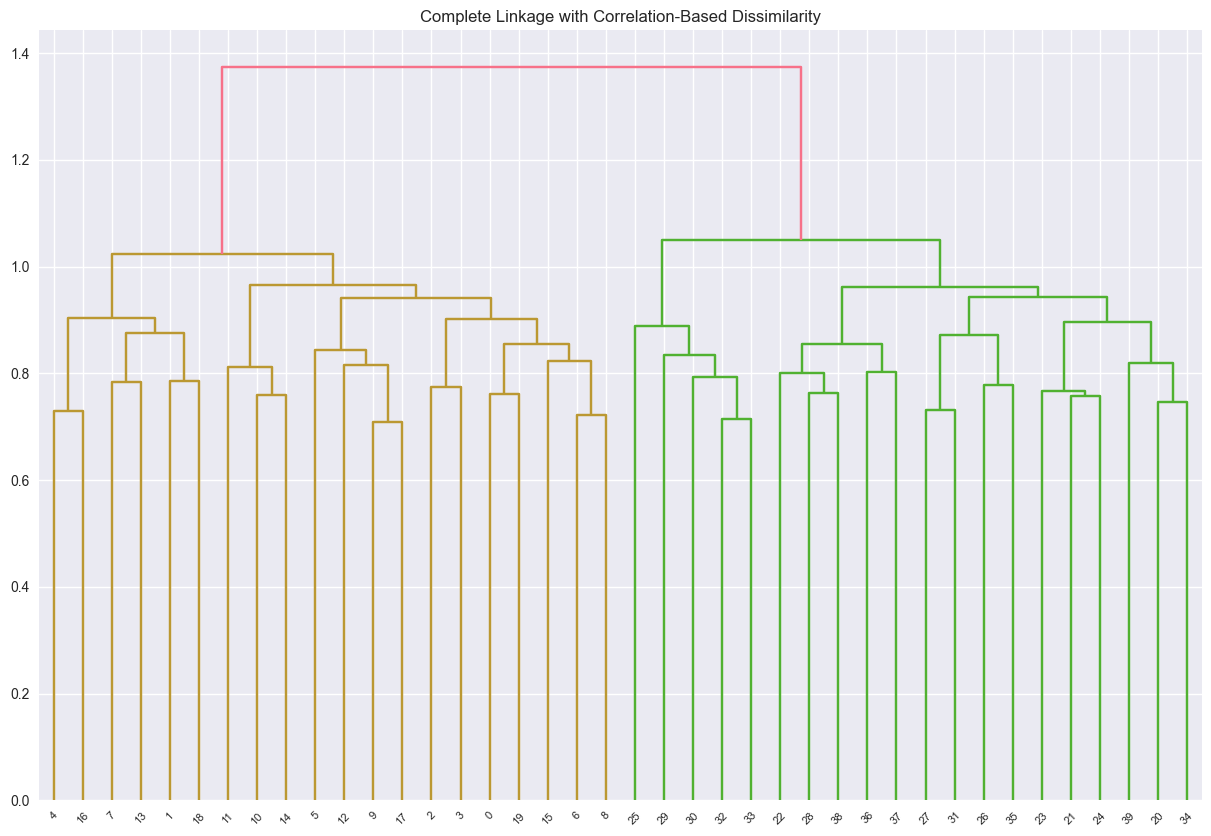

In [32]:
# Complete linkage method
hc_cor = linkage(corD, method='complete', metric='correlation')

plt.figure(figsize=(15, 10))
dendrogram(hc_cor, color_threshold=1.2)
plt.title("Complete Linkage with Correlation-Based Dissimilarity")

In [33]:
fcluster(hc_cor, t=2, criterion='maxclust')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [34]:
# Single linkage method
hc_single = linkage(corD, method='single', metric='correlation')
fcluster(hc_single, t=2, criterion='maxclust')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [35]:
# Average linkage method
hc_avg = linkage(corD, method='average', metric='correlation')
fcluster(hc_avg, t=2, criterion='maxclust')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

Regardless of the linkage method used, the resulting clusters are the same when we cut the tree to have 2 clusters. The observations assigned to each cluster are consistent across all the cases shown above.

### 13.c

To address our collaborator's question, one approach could be to visualize the data in order to identify the genes that exhibit the greatest differences between the two groups. Given that we are working with high-dimensional data, it would be beneficial to obtain a lower-dimensional representation of the data. Principal Component Analysis (PCA) is a suitable technique for this purpose.